<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week2/sol/Imdbchalenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import time
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://www.imdb.com/list/ls009668579/"
page = requests.get(url)
print(page)#checking for Response 200


<Response [200]>


In [183]:
soup = bs(page.content , "html.parser")

#to list of names and the release date

m_frame = soup.find("div" , class_ = "lister-list")
m_name = m_frame.findAll("h3", class_="lister-item-header")

m_name_list =[name.text.strip().split("\n") for name in m_name] 
m_name_list_t = np.array(m_name_list).T.tolist()
m_names = m_name_list_t[:][1]
m_r_date = m_name_list_t[:][2]
m_r_dates = [i.replace("("," ").replace(")","").replace("I","").strip() for i in m_r_date]


In [ ]:
m_names

In [ ]:
m_r_dates

In [ ]:

#create descripton list 
m_desc = m_frame.findAll("p",class_ ="" )
m_desc_list = [d.text.strip().split("\n") for d in m_desc]
m_desc_list


In [ ]:
#list of genres
m_genre = m_frame.findAll("span", class_ = "genre")
m_genre_list =[genre.text.strip().split("\n") for genre in m_genre]
m_genre_list

In [ ]:
#list of duration
m_duration = m_frame.findAll("span", class_ = "runtime")
m_duration_list = [dur.text.strip() for dur in m_duration]
m_duration_list

In [ ]:
#df 
df_dict={"Names":m_names,"Release Dates":m_r_dates, "Desc":m_desc_list ,"Duration Time":m_duration_list , "Genre":m_genre_list}
df_dict
df = pd.DataFrame(data = df_dict)
df

In [ ]:
sns.boxplot(x="Duration Time", y="Release Dates", data=df,
            whis=[0, 100], width=.6, palette="vlag")

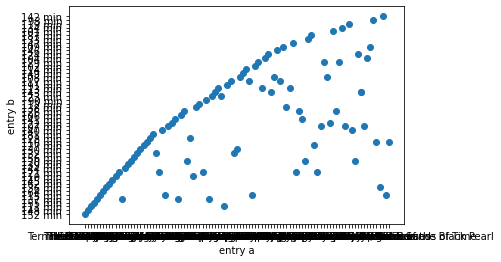

In [166]:
plt.scatter('Names', 'Duration Time', data=df)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [ ]:
plt.subplots(figsize=(10,8))
labels = data["Genre"]
salesData   = [data['Year of release'], data['Starring']]
plt.axis("equal")
plt.pie(salesData, labels=labels ,autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Names')
plt.show()


In [ ]:
''''data = {
    'Movie':m_names,
    'Year of release': m_r_dates,
    'Genre': m_genre_list,
    'Directed by': directors,
    'Starring': stars,
    'Synopsis': m_desc_list,
    #'Box Office Gross in Million Dollars': gross,
    'Duration in minutes':duration_list,
    'IMDB User Rating': ratings,
    'Metascore from Metacritic': metascores
}   '''''


In [195]:
df["Genre"]

0            [Action, Crime, Drama]
1       [Action, Adventure, Sci-Fi]
2            [Action, Crime, Drama]
3        [Action, Adventure, Drama]
4                  [Action, Sci-Fi]
                  ...              
95    [Action, Adventure, Thriller]
96    [Action, Adventure, Thriller]
97      [Action, Adventure, Sci-Fi]
98          [Action, Drama, Sci-Fi]
99     [Action, Adventure, Fantasy]
Name: Genre, Length: 100, dtype: object